In [3]:
# Setup

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root as sp_root

from utils.solvers import FirstOrderDiffEqn
from utils.solvers.firstorder import num_sol_runge_kutta,num_sol_euler
from utils.plot.utils import draw_circle, draw_arrow

plt.rcParams["figure.figsize"] = (20, 5)

def saveFig(filename, chapter):
  plt.savefig(f"plots/chapter{chapter}/{filename}.png", facecolor="w")

# Chapter 3 - Bifurcations

- Varying parameters can lead to qualitative changes in the behaviour of a system
- Changes to fixed points are called **bifurcations**
  - Values at which these changes occur are **bifurcation points**

## Saddle-node Bifurcation

(A.K.A fold bifurcation, turning-point bifurcation)

General mechanism by which fixed-points are created/destroyed

$$
\begin{equation}
\dot{x} = x^2 + r
\end{equation}
$$

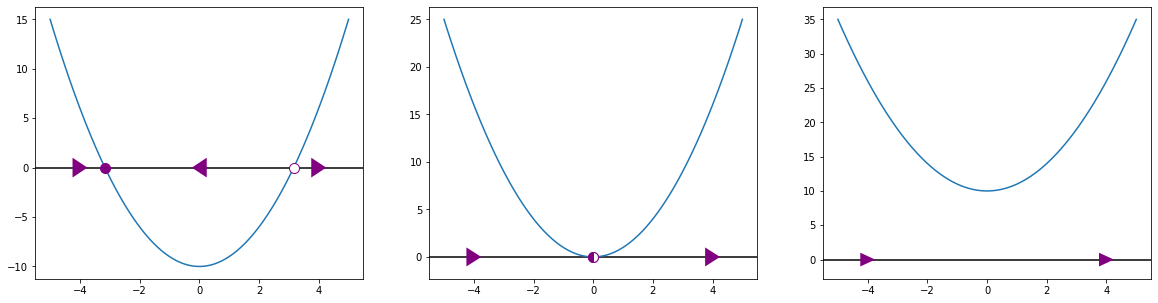

In [4]:
x = np.linspace(-5, 5, 100)
quadratic = lambda x, r: x ** 2 + r

for idx, r in enumerate([-10, -1e-10, 10], start=1):
  plt.subplot(1, 3, idx)
  plt.plot(x, quadratic(x, r))
  roots = sp_root(lambda x: quadratic(x, r), [-2, 2])
  if roots.success:
    for root in roots.x:
      if root < -1:
        draw_circle([root, 0], radius=10, type='full')
      elif root > 1:
        draw_circle([root, 0], radius=10, type='empty')
      else:
        draw_circle([root, 0], radius=10, type='left')
  plt.axhline(color='black', zorder=-100)

plt.subplot(1, 3, 1)
draw_arrow([-4, 0], 'right', head_width=2, head_length=0.5, zorder=100)
draw_arrow([0, 0], 'left', head_width=2, head_length=0.5, zorder=100)
draw_arrow([4, 0], 'right', head_width=2, head_length=0.5, zorder=100)

plt.subplot(1, 3, 2)
draw_arrow([-4, 0], 'right', head_width=2, head_length=0.5, zorder=100)
draw_arrow([4, 0], 'right', head_width=2, head_length=0.5, zorder=100)

plt.subplot(1, 3, 3)
draw_arrow([-4, 0], 'right', head_width=2, head_length=0.5, zorder=100)
draw_arrow([4, 0], 'right', head_width=2, head_length=0.5, zorder=100)

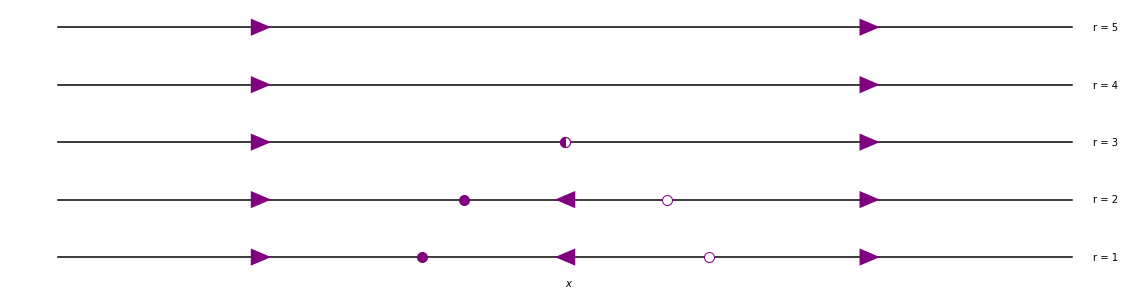

In [5]:
for idx, r in enumerate(np.linspace(-2, 2, 5), start=1):
  plt.plot([-5, 5], [idx, idx], color='black')
  roots = sp_root(lambda x: quadratic(x, r - 1e-10), [-2, 2])
  if roots.success:
    for root in roots.x:
      if root < -1:
        draw_circle([root, idx], radius=10, type='full')
      elif root > 1:
        draw_circle([root, idx], radius=10, type='empty')
      else:
        draw_circle([root, idx], radius=10, type='left')
  plt.text(5.2, idx - 0.05, "r = " + str(idx))

draw_arrow([-3, 1], 'right', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([0, 1], 'left', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([3, 1], 'right', head_width=0.3, head_length=0.2, zorder=100)

draw_arrow([-3, 2], 'right', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([0, 2], 'left', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([3, 2], 'right', head_width=0.3, head_length=0.2, zorder=100)

draw_arrow([-3, 3], 'right', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([3, 3], 'right', head_width=0.3, head_length=0.2, zorder=100)

draw_arrow([-3, 4], 'right', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([3, 4], 'right', head_width=0.3, head_length=0.2, zorder=100)

draw_arrow([-3, 5], 'right', head_width=0.3, head_length=0.2, zorder=100)
draw_arrow([3, 5], 'right', head_width=0.3, head_length=0.2, zorder=100)

plt.axis("off")
plt.text(0, 0.5, "$x$")

plt.show()

When $r < 0$ there are two fixed points, when $r > 0$ there are no fixed points. The bifurcation point is $r = 0$.

Bifurcations usually represented by a **bifurcation diagram**, shows how fixed points vary with parameter, the independent variable becomes depenedent on the parameter (hence plotted on the x-axis)

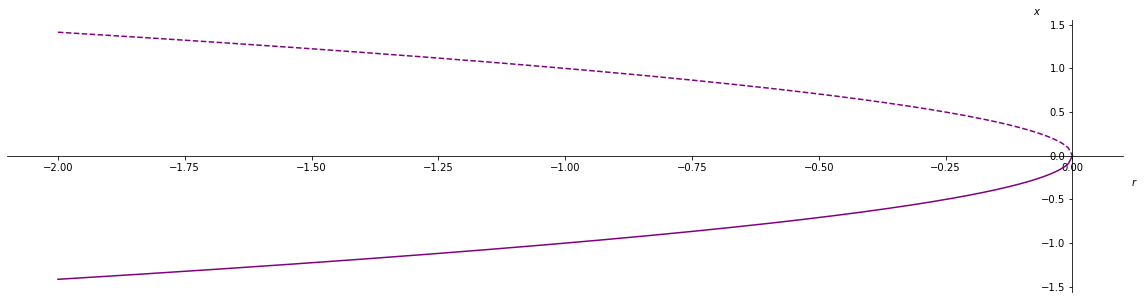

In [6]:
fixed_points = np.full([2, 2, 501], None)

for idx, r in enumerate(np.linspace(-2, 2, 501)):
  roots = sp_root(lambda x: quadratic(x, r - 1e-10), [-2, 2])

  if roots.success:
    fixed_points[0][0][idx] = r
    fixed_points[0][1][idx] = roots.x[0]
    fixed_points[1][0][idx] = r
    fixed_points[1][1][idx] = roots.x[1]

plt.plot(fixed_points[0][0], fixed_points[0][1], color='purple')
plt.plot(fixed_points[1][0], fixed_points[1][1], color='purple', ls="--")

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")

plt.xlabel("$r$", x=1.01)
plt.ylabel("$x$", rotation=0, y=1.01)

plt.show()

$(1)$ is the **normal form** of the saddle-node bifurcation, as all such bifurcations occur this way

## Transcritical Bifurcation

- When a fixed point exists for all values of parameter
- Normal form is
$$
\begin{equation}
\dot{x} = rx - x^2
\end{equation}
$$

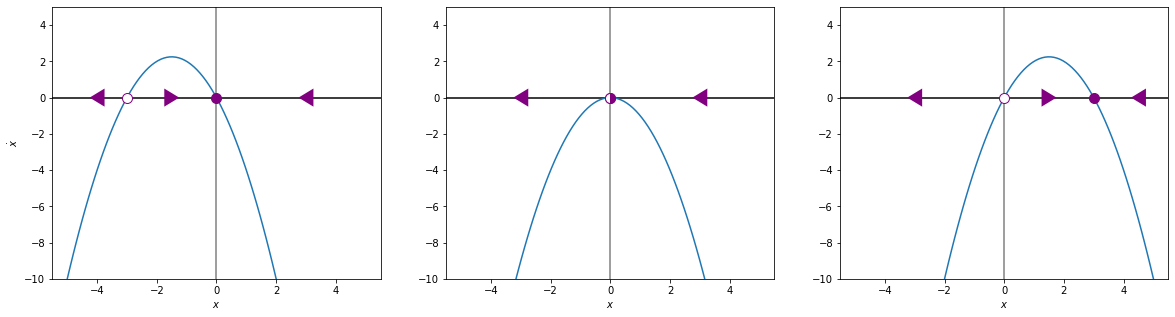

In [7]:
x = np.linspace(-5, 5, 100)
transcritical_fn = lambda x, r: x * r - x ** 2

for idx, r in enumerate([-3, -1e-10, 3], start=1):
  plt.subplot(1, 3, idx)
  plt.plot(x, transcritical_fn(x, r))
  roots = sp_root(lambda x: transcritical_fn(x, r), [-4, 4])
  if roots.success:
    for root in roots.x:
      if root < -1:
        draw_circle([root, 0], radius=10, type='empty')
      elif root > 1:
        draw_circle([root, 0], radius=10, type='full')
      else:
        draw_circle([root, 0], radius=10, type='full' if idx == 1 else 'right' if idx == 2 else 'empty')
  plt.axhline(color='black', zorder=-100)

plt.subplot(1, 3, 1)
draw_arrow([-4, 0], 'left', head_width=1, head_length=0.5, zorder=100)
draw_arrow([-1.5, 0], 'right', head_width=1, head_length=0.5, zorder=100)
draw_arrow([3, 0], 'left', head_width=1, head_length=0.5, zorder=100)
plt.ylim([-10, 5])
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")
plt.axvline(color='grey', zorder=-100)

plt.subplot(1, 3, 2)
draw_arrow([-3, 0], 'left', head_width=1, head_length=0.5, zorder=100)
draw_arrow([3, 0], 'left', head_width=1, head_length=0.5, zorder=100)
plt.ylim([-10, 5])
plt.xlabel("$x$")
plt.axvline(color='grey', zorder=-100)

plt.subplot(1, 3, 3)
draw_arrow([-3, 0], 'left', head_width=1, head_length=0.5, zorder=100)
draw_arrow([1.5, 0], 'right', head_width=1, head_length=0.5, zorder=100)
draw_arrow([4.5, 0], 'left', head_width=1, head_length=0.5, zorder=100)
plt.ylim([-10, 5])
plt.xlabel("$x$")
plt.axvline(color='grey', zorder=-100)

plt.show()

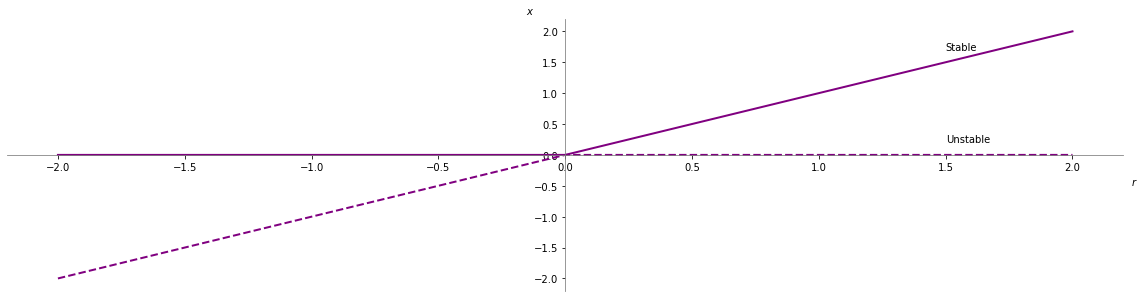

In [8]:
fixed_points = np.full([2, 2, 501], None)

for idx, r in enumerate(np.linspace(-2, 2, 501)):
  roots = sp_root(lambda x: transcritical_fn(x, r - 1e-10), [-2, 2])

  if roots.success:
    fixed_points[0][0][idx] = r
    fixed_points[0][1][idx] = roots.x[0]
    fixed_points[1][0][idx] = r
    fixed_points[1][1][idx] = roots.x[1]

plt.plot(fixed_points[0][0], fixed_points[0][1], color='purple', ls="--", lw=2)
plt.plot(fixed_points[1][0], fixed_points[1][1], color='purple', lw=2)

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(1.5, 0.2, "Unstable")
plt.text(1.5, 1.7, "Stable")

plt.xlabel("$r$", x=1.01)
plt.ylabel("$x$", rotation=0, y=1.01)

plt.show()

## Pitchfork Bifurcation

- Systems with symmetries often create symmetric fixed points
- Two types of pitchfork bifurcation: **supercritical** and **subcritial**

### Supercritical
The normal form is
$$
\begin{equation}
\dot{x} = rx - x^3
\end{equation}
$$

- Invariant under $x \rightarrow -x$
- When $r < 0$ there is a stable fixed point at the origin
- When $r > 0$ there are two stable fixed points at $\pm\sqrt{r}$
- Bifurcation point at $r = 0$
  - No linearization, but stable

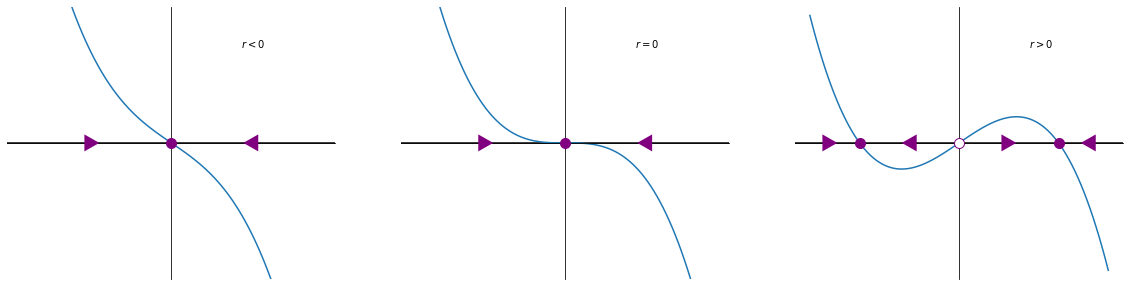

In [9]:
pitchfork_fn = lambda x, r: r * x - x ** 3

for idx, r in enumerate([-1, 0, 1], start=1):
  x = np.linspace(-1.5, 1.5, 100)
  x_dot = pitchfork_fn(x, r)

  plt.subplot(1, 3, idx)
  plt.plot(x, x_dot)
  plt.axhline(color='black', zorder=-100)
  plt.gca().spines["left"].set_position("zero")
  plt.gca().spines["bottom"].set_position("zero")
  plt.gca().spines["right"].set_color("none")
  plt.gca().spines["top"].set_color("none")
  plt.ylim([-2, 2])
  plt.xticks([])
  plt.yticks([])

plt.subplot(1, 3, 1)
draw_circle([0, 0], radius=10, type='full', zorder=100)
draw_arrow([0.8, 0], direction='left', head_width=0.25, head_length=0.15, zorder=100)
draw_arrow([-0.8, 0], direction='right', head_width=0.25, head_length=0.15, zorder=100)
plt.text(0.7, 1.4, "$r < 0$")

plt.subplot(1, 3, 2)
draw_circle([0, 0], radius=10, type='full', zorder=100)
draw_arrow([0.8, 0], direction='left', head_width=0.25, head_length=0.15, zorder=100)
draw_arrow([-0.8, 0], direction='right', head_width=0.25, head_length=0.15, zorder=100)
plt.text(0.7, 1.4, "$r = 0$")

plt.subplot(1, 3, 3)
draw_circle([0, 0], radius=10, type='empty', zorder=100)
draw_circle([1, 0], radius=10, type='full', zorder=100)
draw_circle([-1, 0], radius=10, type='full', zorder=100)
draw_arrow([0.5, 0], direction='right', head_width=0.25, head_length=0.15, zorder=100)
draw_arrow([1.3, 0], direction='left', head_width=0.25, head_length=0.15, zorder=100)
draw_arrow([-0.5, 0], direction='left', head_width=0.25, head_length=0.15, zorder=100)
draw_arrow([-1.3, 0], direction='right', head_width=0.25, head_length=0.15, zorder=100)
plt.text(0.7, 1.4, "$r > 0$")

plt.show()

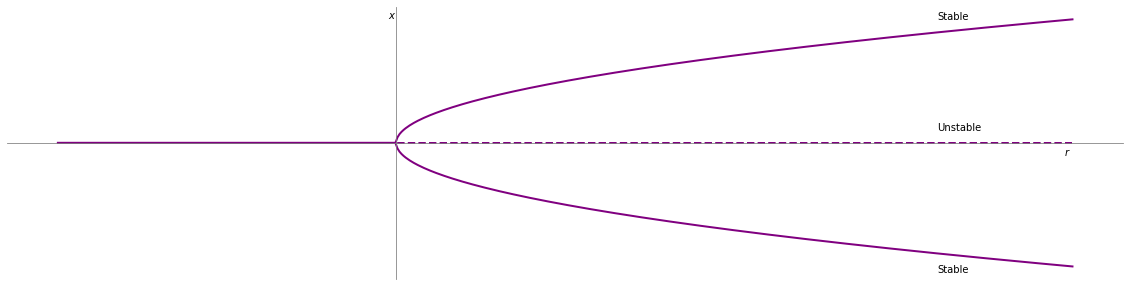

In [10]:
fixed_points = np.full([3, 2, 500], None)

for idx, r in enumerate(np.linspace(-0.5, 1, 500)):
  roots = sp_root(lambda x: pitchfork_fn(x, r - 1e-10), [-1, 0, 1])

  if roots.success:
    fixed_points[0][0][idx] = r
    fixed_points[0][1][idx] = roots.x[0]
    fixed_points[1][0][idx] = r
    fixed_points[1][1][idx] = roots.x[1]
    fixed_points[2][0][idx] = r
    fixed_points[2][1][idx] = roots.x[2]

plt.plot(fixed_points[0][0], fixed_points[0][1], color='purple', lw=2)
plt.plot(fixed_points[1][0], fixed_points[1][1], color='purple', ls="--", lw=2)
plt.plot(fixed_points[2][0], fixed_points[2][1], color='purple', lw=2)

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(0.8, 0.1, "Unstable")
plt.text(0.8, 1.0, "Stable")
plt.text(0.8, -1.05, "Stable")

plt.xlabel("$r$", x=0.95)
plt.ylabel("$x$", rotation=0, y=0.95)
plt.xticks([])
plt.yticks([])

plt.show()

### Subcritical
Normal form:
$$
\begin{equation}
\dot{x} = rx + x^3
\end{equation}
$$

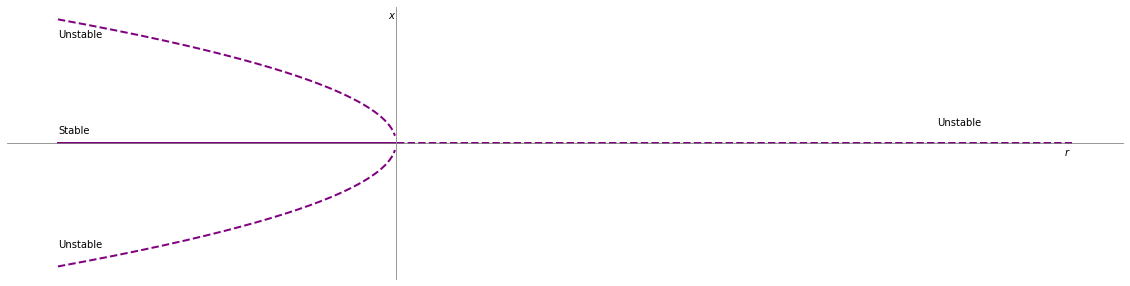

In [11]:
fixed_points = np.full([3, 2, 500], None)
pitchfork_sub_fn = lambda x, r: r * x + x ** 3
rs = np.linspace(-0.5, 1, 600)

plt.plot(rs[:200], np.sqrt(-rs[:200]), color='purple', lw=2, ls="--")
plt.plot(rs[:200], -np.sqrt(-rs[:200]), color='purple', lw=2, ls="--")
plt.plot(rs[:200], np.zeros_like(rs[:200]), color='purple', lw=2)
plt.plot(rs[200:], np.zeros_like(rs[200:]), color='purple', lw=2, ls="--")

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(0.8, 0.1, "Unstable")
plt.text(-0.5, -0.6, "Unstable")
plt.text(-0.5, 0.6, "Unstable")
plt.text(-0.5, 0.05, "Stable")

plt.xlabel("$r$", x=0.95)
plt.ylabel("$x$", rotation=0, y=0.95)
plt.xticks([])
plt.yticks([])

plt.show()

### Higher order terms
In physical systems, higher order terms prevent blowup e.g.
$$
\begin{equation}
\dot{x} = rx + x^3 - x^5
\end{equation}
$$

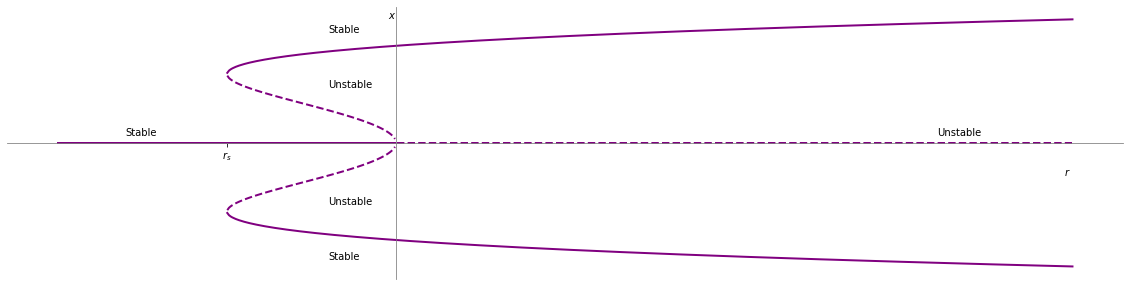

In [29]:
subcrit_pitchfork_fn = lambda x, r: r * x + x ** 3 - x ** 5

rs = np.linspace(-0.5, 1, 600)

plt.plot(rs[:200], np.zeros_like(rs[:200]) / 2, color='purple', lw=2)
plt.plot(rs[200:], np.zeros_like(rs[200:]) / 2, color='purple', lw=2, ls="--")
plt.plot(rs[100:], np.sqrt(1 + np.sqrt(1 + 4 * rs[100:])) / 2, color='purple', lw=2)
plt.plot(rs[100:200], np.sqrt(1 - np.sqrt(1 + 4 * rs[100:200])) / 2, color='purple', lw=2, ls="--")
plt.plot(rs[100:], -np.sqrt(1 + np.sqrt(1 + 4 * rs[100:])) / 2, color='purple', lw=2)
plt.plot(rs[100:200], -np.sqrt(1 - np.sqrt(1 + 4 * rs[100:200])) / 2, color='purple', lw=2, ls="--")

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(-0.4, 0.05, "Stable")
plt.text(0.8, 0.05, "Unstable")
plt.text(-0.1, 0.4, "Unstable")
plt.text(-0.1, -0.45, "Unstable")
plt.text(-0.1, 0.8, "Stable")
plt.text(-0.1, -0.85, "Stable")

plt.xlabel("$r$", x=0.95)
plt.ylabel("$x$", rotation=0, y=0.95)
plt.xticks([-0.25], ["$r_s$"])
plt.yticks([])

plt.show()

Starting from $r < r_s$:
1. Initially stable at $x=0$
2. Increasing $r$ beyond $r=0$ causes fixed point to become unstable
3. Small perturbation moves phase point to a stable branch
4. Decreasing $r$ will cause it to remain on the branch even for $r_s < r < 0$
5. Decreasing beyond $r_s$ causes a return to $x=0$

The dependence on the historical state of the system (i.e. value at $r_s < r < 0$ depending on the direction $r$ is changing from) is called **hysteresis**

### Imperfections

Real systems typically have imperfections, these can be characterised by a parameter $h$:
$$
\begin{equation}
\dot{x} = h + rx - x^3
\end{equation}
$$
This is a supercritical pitchfork bifurcation with an imperfection.

The roots are when $h = x^3 - rx$

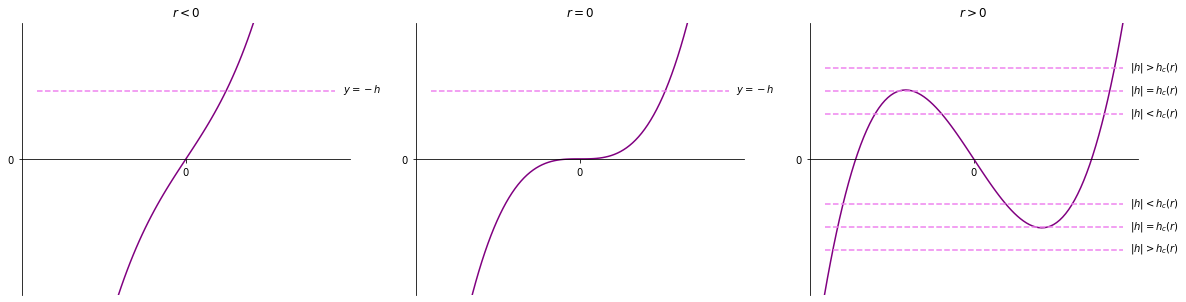

In [35]:
h = 1.5
k = 1
imperfect_pitchfork_fn = lambda x, k: h + k * x - x ** 3

x = np.linspace(-2, 2, 100)
for idx, r in enumerate([-2.5, 0, 2.5], start=1):
  plt.subplot(1, 3, idx)
  plt.title("$r" + ("< 0" if r < 0 else "= 0" if r == 0 else "> 0") + "$")
  plt.plot(x, x**3 - r * x, color="purple")

  if idx < 3:
    plt.plot(x, h * np.ones_like(x), color="violet", ls="--")
    plt.text(2.1, h - 0.05, "$y=-h$")


  plt.ylim([-3, 3])
  plt.gca().spines["bottom"].set_position("zero")
  plt.gca().spines["top"].set_color("none")
  plt.gca().spines["right"].set_color("none")
  plt.xticks([0], ["$0$"])
  plt.yticks([0], ["$0$"])

plt.subplot(1, 3, 3)
for h in [1, 1.5, 2]:
  for sign in [1, -1]:
    plt.plot(x, sign * h * np.ones_like(x), color="violet", ls="--")
    plt.text(2.1, sign * h - 0.05, "$|h|" + ("<" if h < 1.5 else ">" if h > 1.5 else "=") + "h_c(r)$")

saveFig(filename="imperfect_pitchfork", chapter=3)

Saddle-node bifurcation occurs when $h = \pm h_c(r)$ with $h_c(r) = \frac{1}{\sqrt{3}} r^{3/2}$. This can be visualised with a **stability diagram** that shows the bifurcation curves in $(r, h)$ space

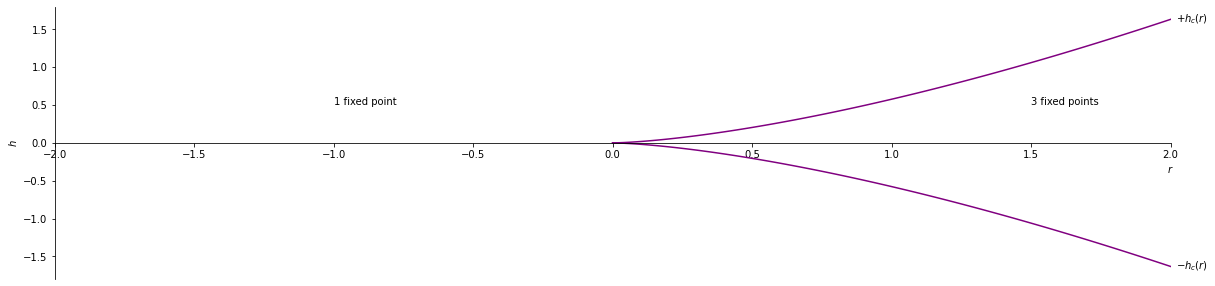

In [36]:
r = np.linspace(0, 2, 100)
h_c = (r ** 1.5) / np.sqrt(3)
plt.plot(r, h_c, r, -h_c, color="purple")
plt.xlabel("$r$", x=1)
plt.ylabel("$h$")
plt.text(2.02, 1.6, "$+h_c(r)$")
plt.text(2.02, -1.67, "$-h_c(r)$")
plt.xlim([-2, 2])

plt.text(-1, 0.5, "1 fixed point")
plt.text(1.5, 0.5, "3 fixed points")

plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["bottom"].set_position("zero")

saveFig("imperfect_pitchfork_stability", 3)

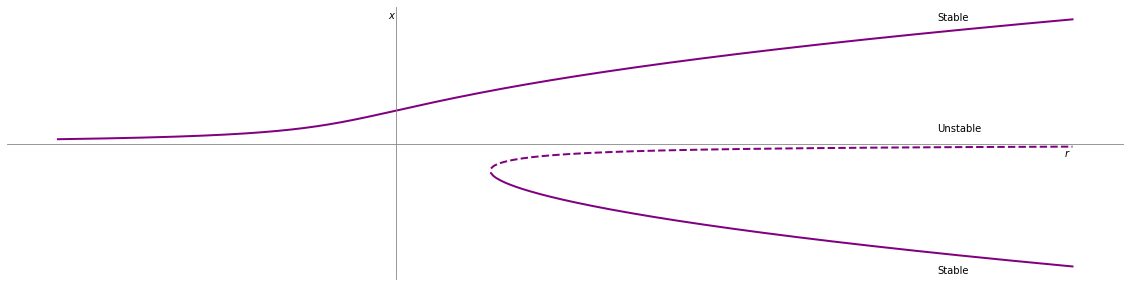

In [38]:
h = 0.02
fixed_points = np.full([3, 2, 500], None)

for idx, r in enumerate(np.linspace(-0.5, 1, 500)):
  roots = sp_root(lambda x: imperfect_pitchfork_fn(x, r - 1e-10), [1])
  roots_bifurc = sp_root(lambda x: imperfect_pitchfork_fn(x, r - 1e-10), [0, -1])

  fixed_points[0][0][idx] = r
  fixed_points[0][1][idx] = roots.x[0]
  if roots_bifurc.success:
    fixed_points[1][0][idx] = r
    fixed_points[1][1][idx] = roots_bifurc.x[0]
    fixed_points[2][0][idx] = r
    fixed_points[2][1][idx] = roots_bifurc.x[1]

plt.plot(fixed_points[0][0], fixed_points[0][1], color='purple', lw=2)
plt.plot(fixed_points[1][0][210:], fixed_points[1][1][210:], color='purple', ls="--", lw=2)
plt.plot(fixed_points[2][0][210:], fixed_points[2][1][210:], color='purple', lw=2)

plt.gca().spines["left"].set_position("zero")
plt.gca().spines["bottom"].set_position("zero")
plt.gca().spines["right"].set_color("none")
plt.gca().spines["top"].set_color("none")
plt.gca().spines["left"].set_color("grey")
plt.gca().spines["bottom"].set_color("grey")

plt.text(0.8, 0.1, "Unstable")
plt.text(0.8, 1.0, "Stable")
plt.text(0.8, -1.05, "Stable")

plt.xlabel("$r$", x=0.95)
plt.ylabel("$x$", rotation=0, y=0.95)
plt.xticks([])
plt.yticks([])

saveFig("imperfect_pitchfork_bifurc", 3)

As $r$ increases the fixed point smoothly transitions to the top branch, the lower branch is merged with the center unstable fixed point, and a large perturbation is required to reach the lower branch.

All information about how the fixed points vary with parameters can be captured in a three dimensional plot:

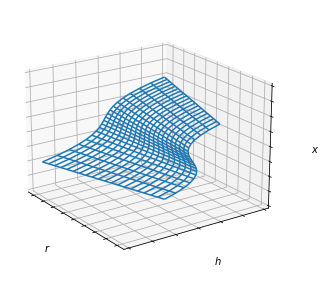

In [104]:
ax = plt.subplot(projection="3d")

rs = np.linspace(-10, 10, 20)
xs = np.linspace(-10, 10, 20)
rs, xs = np.meshgrid(rs, xs)
hs = xs ** 3 - rs * xs * 4

surf = ax.plot_wireframe(rs, hs, xs)
ax.view_init(20, -35)
ax.set_xlabel("$r$")
ax.set_ylabel("$h$")
ax.set_zlabel("$x$")
ax.set_zlim([-20, 20])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

saveFig("imperfect_pitchfork_3d", 3)